In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather_data = pd.read_csv('weather_station_data.csv')
weather_data.head()

,Date,Time,Temperature (F),Humidity (%)
0,"Friday, November 15",5:00 AM,56,92
1,"Friday, November 15",6:00 AM,56,85
2,"Friday, November 15",7:00 AM,57,82
3,"Friday, November 15",8:00 AM,57,78
4,"Friday, November 15",9:00 AM,57,78


In [6]:
# Convert 'Date' column to a standard format before combining with 'Time'
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Date'], format='%A, %B %d')
weather_data['Datetime'] = pd.to_datetime(weather_data['Formatted Date'].dt.strftime('%Y-%m-%d') + ' ' + weather_data['Time'])



In [ ]:
#Calculate daily average temperature and humidity
weather_data['Day'] = weather_data['Datetime'].dt.date
daily_averages = weather_data.groupby('Day').agg({'Temperature (F)': 'mean', 'Humidity (%)': 'mean'})

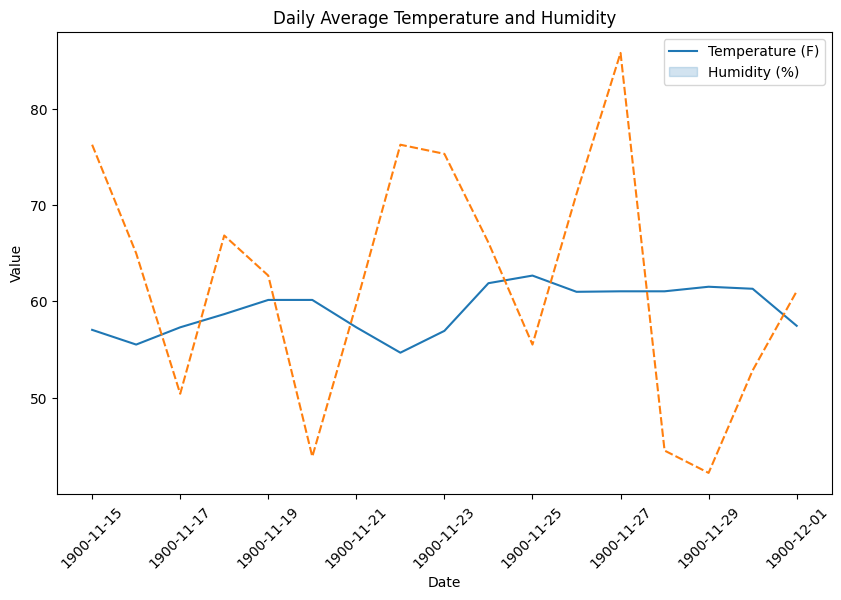

In [8]:
#Daily average temperature and humidity
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_averages, palette="tab10")
plt.title('Daily Average Temperature and Humidity')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Temperature (F)', 'Humidity (%)'])
plt.show()

In [ ]:
#Hourly trends
weather_data['Hour'] = weather_data['Datetime'].dt.hour
hourly_trends = weather_data.groupby('Hour').agg({'Temperature (F)': 'mean', 'Humidity (%)': 'mean'})

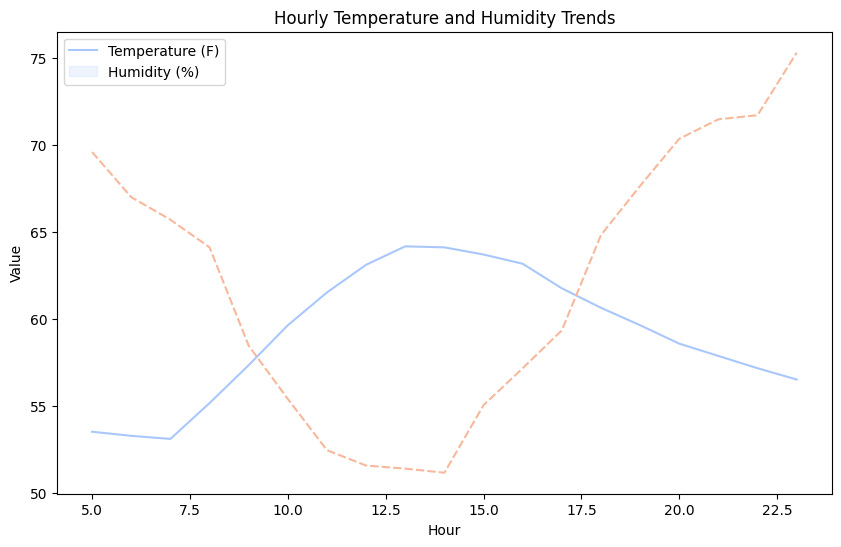

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trends, palette="coolwarm")
plt.title('Hourly Temperature and Humidity Trends')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.legend(['Temperature (F)', 'Humidity (%)'])
plt.show()